In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
data = pd.read_csv("whole_data.csv")

x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv", header=None, names = ['target'])
x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv", header=None, names = ['target'])

In [112]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (100000, 200)
y_train shape:  (100000, 1)
x_test shape:  (100000, 200)
y_test shape:  (100000, 1)


# EDA for Gaussian Naive Bayes:

In [113]:
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (10, 10)
title_config = {'fontsize': 14, 'y': 1.05}

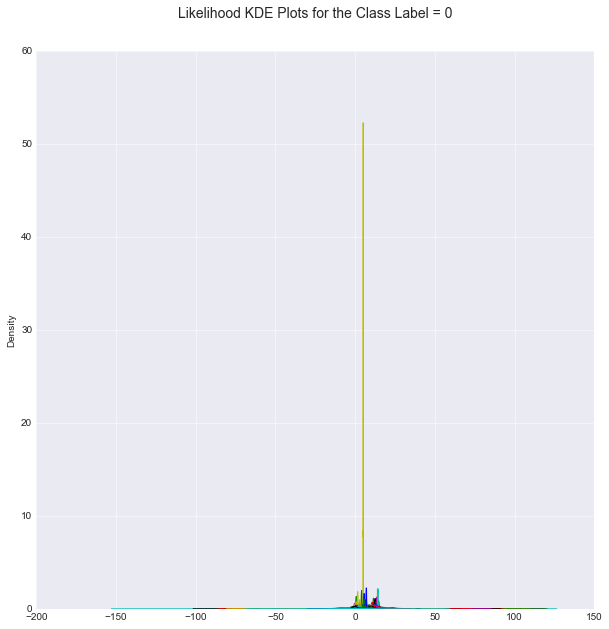

In [114]:
## Look at the likelihood distributions by potting the KED (Kernel Density Estimates).
pd.DataFrame(x_train.values.astype('float64')[y_train['target'].values == 0]).plot.kde(ind=100, legend=False)
plt.title('Likelihood KDE Plots for the Class Label = 0', **title_config);

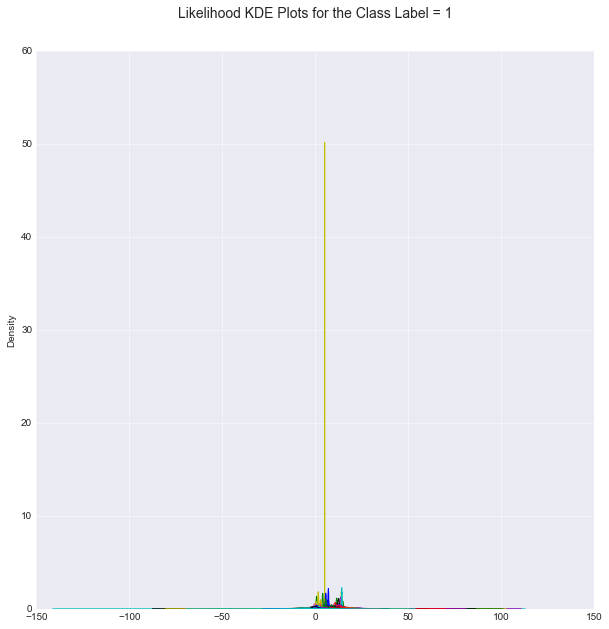

In [115]:
## Look at the likelihood distributions by potting the KED (Kernel Density Estimates).
# Each color represent one feature distribution!!! 
pd.DataFrame(x_train.values.astype('float64')[y_train['target'].values == 1]).plot.kde(ind=100, legend=False)
plt.title('Likelihood KDE Plots for the Class Label = 1', **title_config);

In [116]:
from sklearn.preprocessing import StandardScaler
scaled = pd.DataFrame(StandardScaler().fit_transform(x_train))

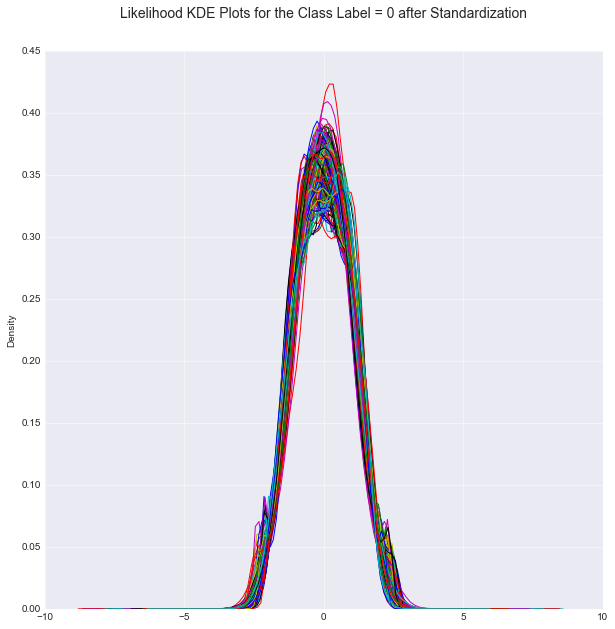

In [119]:
pd.DataFrame(scaled.values.astype('float64')[y_train['target'].values == 0]).plot.kde(ind=100, legend=False)
plt.title('Likelihood KDE Plots for the Class Label = 0 after Standardization', **title_config);

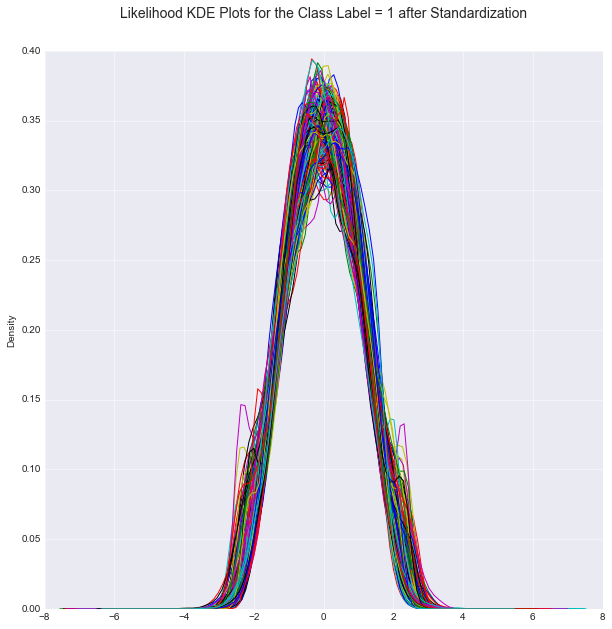

In [120]:
pd.DataFrame(scaled.values.astype('float64')[y_train['target'].values == 1]).plot.kde(ind=100, legend=False)
plt.title('Likelihood KDE Plots for the Class Label = 1 after Standardization', **title_config);

In [122]:
from sklearn.preprocessing import QuantileTransformer
transformed = pd.DataFrame(QuantileTransformer(output_distribution='normal').fit_transform(x_train))

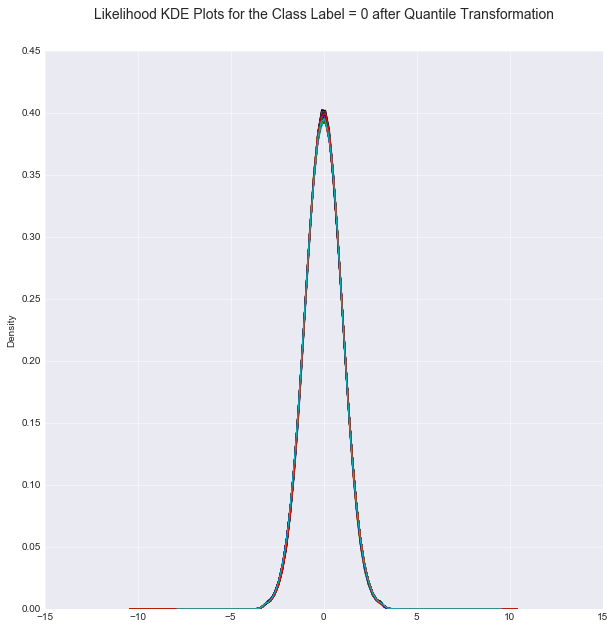

In [124]:
pd.DataFrame(transformed.values.astype('float64')[y_train['target'].values == 0]).plot.kde(ind=100, legend=False)
plt.title('Likelihood KDE Plots for the Class Label = 0 after Quantile Transformation', **title_config);

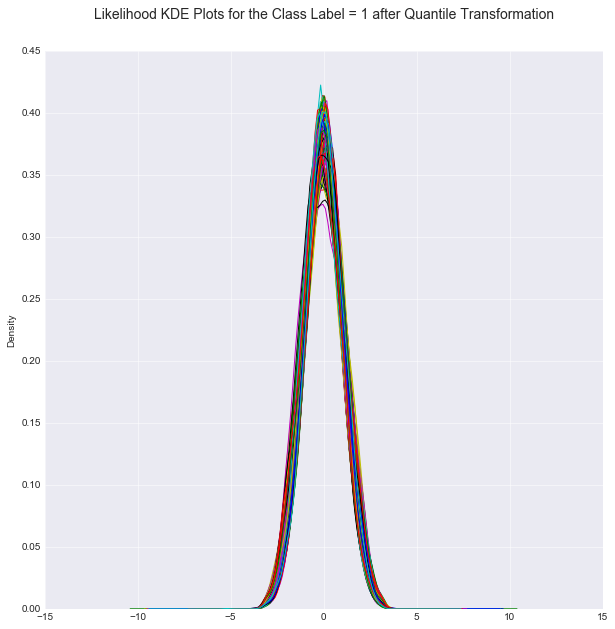

In [125]:
pd.DataFrame(transformed.values.astype('float64')[y_train['target'].values == 1]).plot.kde(ind=100, legend=False)
plt.title('Likelihood KDE Plots for the Class Label = 1 after Quantile Transformation', **title_config);

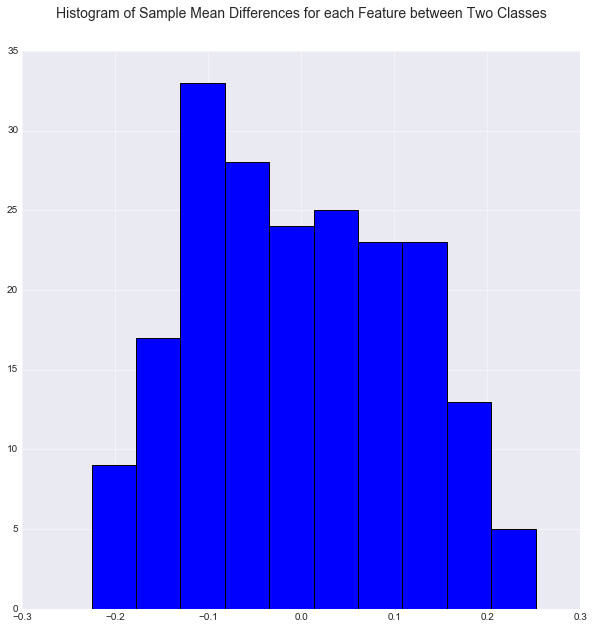

In [131]:
plt.hist(transformed[y_train['target'].values == 0].mean() - transformed[y_train['target'].values == 1].mean())
plt.title('Histogram of Sample Mean Differences for each Feature between Two Classes', **title_config);

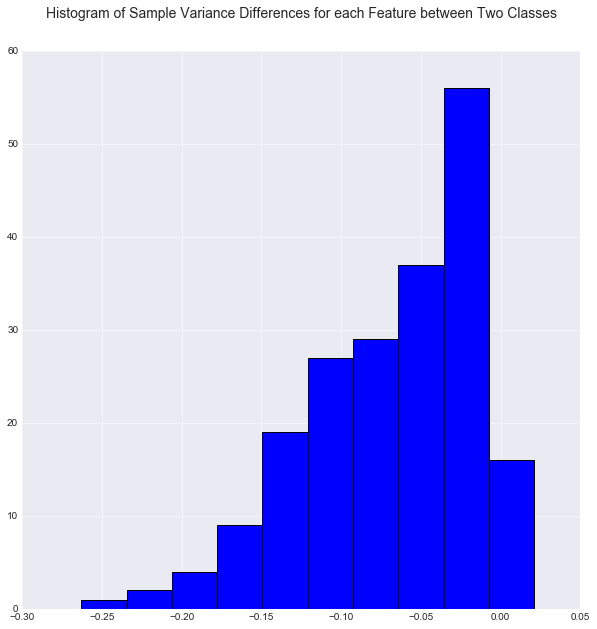

In [133]:
plt.hist(transformed[y_train['target'].values == 0].var() - transformed[y_train['target'].values == 1].var())
plt.title('Histogram of Sample Variance Differences for each Feature between Two Classes', **title_config);

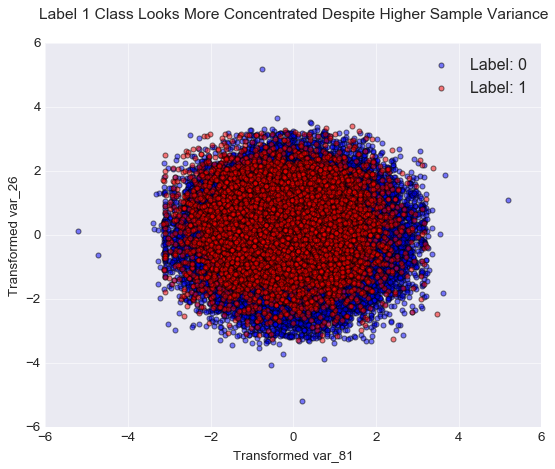

In [150]:
select = (transformed[y_train['target'].values == 0].var() - transformed[y_train['target'].values == 1].var()).nsmallest(2).index
plt.scatter(transformed.loc[y_train['target'].values == 0, select[0]], transformed.loc[y_train['target'].values == 0, select[1]], alpha=0.5, label='Label: 0', c = "blue")
plt.scatter(transformed.loc[y_train['target'].values == 1, select[0]], transformed.loc[y_train['target'].values == 1, select[1]], alpha=0.5, label='Label: 1', c = "red")
plt.xlabel(f'Transformed var_{select[0]}')
plt.ylabel(f'Transformed var_{select[1]}')
plt.title('Label 1 Class Looks More Concentrated Despite Higher Sample Variance', **title_config)
plt.legend();

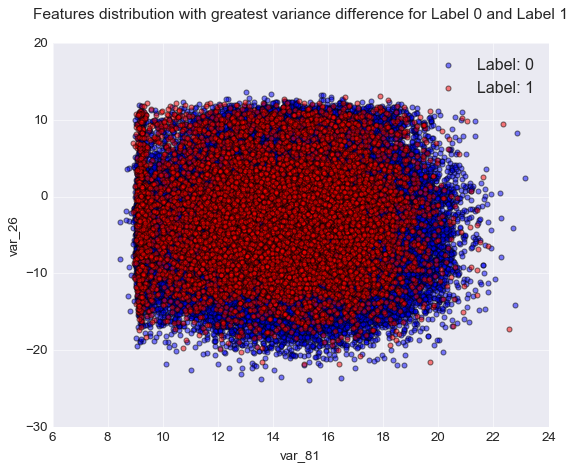

In [169]:
plt.scatter(x_train.values.astype('float64')[y_train['target'].values == 0, select[0]], x_train.values.astype('float64')[y_train['target'].values == 0, select[1]], alpha=0.5, label='Label: 0', c = "blue")
plt.scatter(x_train.values.astype('float64')[y_train['target'].values == 1, select[0]], x_train.values.astype('float64')[y_train['target'].values == 1, select[1]], alpha=0.5, label='Label: 1', c = "red")
plt.xlabel(f'var_{select[0]}')
plt.ylabel(f'var_{select[1]}')
plt.title('Features distribution with greatest variance difference for Label 0 and Label 1', **title_config)
plt.legend();

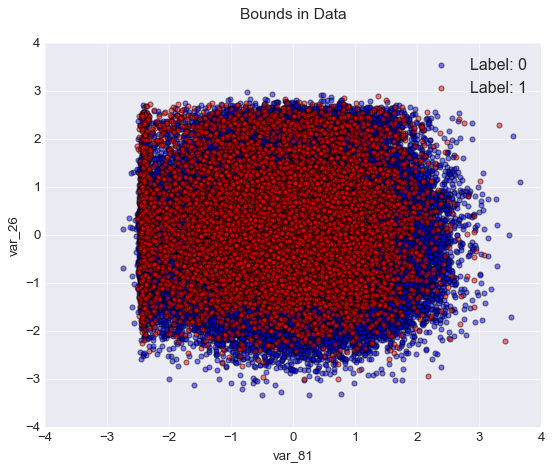

In [170]:
plt.scatter(scaled.values.astype('float64')[y_train['target'].values == 0, select[0]], scaled.values.astype('float64')[y_train['target'].values == 0, select[1]], alpha=0.5, label='Label: 0', c = "blue")
plt.scatter(scaled.values.astype('float64')[y_train['target'].values == 1, select[0]], scaled.values.astype('float64')[y_train['target'].values == 1, select[1]], alpha=0.5, label='Label: 1', c = "red")
plt.xlabel(f'var_{select[0]}')
plt.ylabel(f'var_{select[1]}')
plt.title('Bounds in Data', **title_config)
plt.legend();

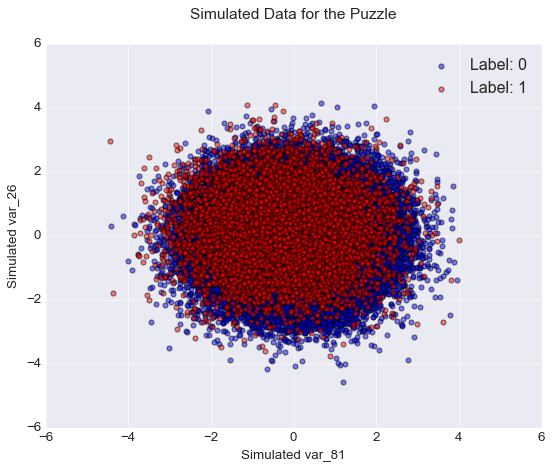

In [168]:
size0 = (y_train['target'].values == 0).sum()
size1 = y_train['target'].values.size - size0
x0 = np.random.normal(transformed.loc[y_train['target'].values == 0, select[0]].mean(),
                      transformed.loc[y_train['target'].values == 0, select[0]].std(), size=size0)
y0 = np.random.normal(transformed.loc[y_train['target'].values == 0, select[1]].mean(),
                      transformed.loc[y_train['target'].values == 0, select[1]].std(), size=size0)
x1 = np.random.normal(transformed.loc[y_train['target'].values == 1, select[0]].mean(),
                      transformed.loc[y_train['target'].values == 1, select[0]].std(), size=size1)
y1 = np.random.normal(transformed.loc[y_train['target'].values == 1, select[1]].mean(),
                      transformed.loc[y_train['target'].values == 1, select[1]].std(), size=size1)
plt.scatter(x0, y0, alpha=0.5, label='Label: 0', c ="blue")
plt.scatter(x1, y1, alpha=0.5, label='Label: 1', c ="red")
plt.xlabel(f'Simulated var_{select[0]}')
plt.ylabel(f'Simulated var_{select[1]}')
plt.title('Simulated Data for the Puzzle', **title_config)
plt.legend();

# Train and Evaluate the Gaussian Naive Bayes model:

In [173]:
## Training and Evaluating the Model:

# combine the quantile transformer and Gaussian naive Bayes classifier.
# As the name suggests, pipeline class allows sticking multiple processes into a single scikit-learn estimator.
# pipeline class has fit, predict and score method just like any other estimator

# Reference: 
#https://www.kaggle.com/dansbecker/pipelines
# https://www.kaggle.com/aashita/advanced-pipelines-tutorial

from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB())
pipeline.fit(x_train.values.astype('float64'), y_train['target'].values)

Pipeline(memory=None,
     steps=[('quantiletransformer', QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='normal', random_state=None,
          subsample=100000)), ('gaussiannb', GaussianNB(priors=None))])

0.892010249487354

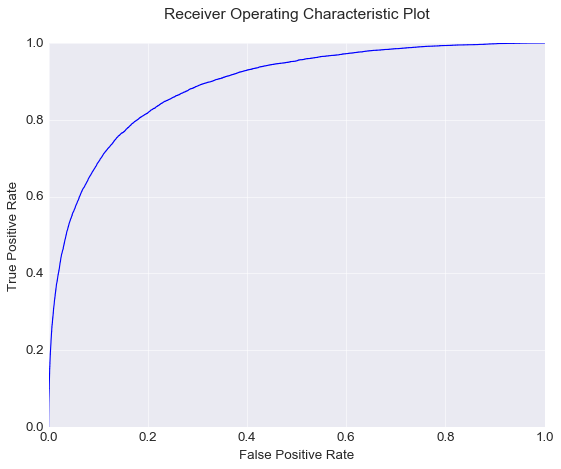

In [174]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thr = roc_curve(y_train['target'].values, pipeline.predict_proba(x_train.values.astype('float64'))[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot', **title_config)
auc(fpr, tpr)

In [175]:
from sklearn.model_selection import cross_val_score

cross_val_score(pipeline, x_train.values.astype('float64'), y_train['target'].values, scoring='roc_auc', cv=10).mean()

0.8883771456969578

0.8887732752285975

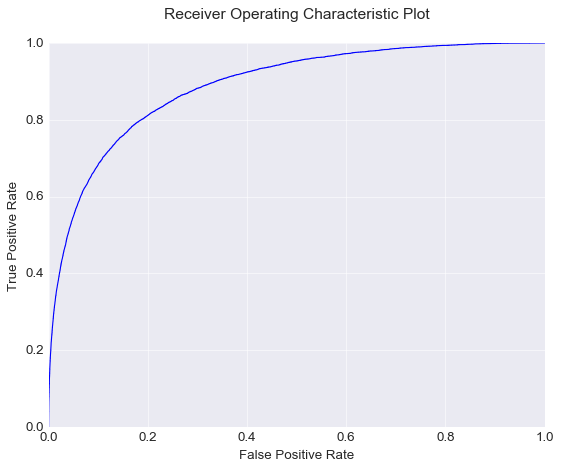

In [178]:
# Testing dataset:
predictions = pipeline.predict_proba(x_test.values.astype('float64'))[:, 1]

fpr, tpr, thr = roc_curve(y_test['target'].values, predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Plot', **title_config)
auc(fpr, tpr)

In [187]:
predictions

array([0.03959896, 0.03806295, 0.00726911, ..., 0.06614793, 0.05292643,
       0.01179708])

In [184]:
np.savetxt('naive_bayes_predictions.txt', predictions)